In [240]:
import pandas as pd 
import numpy as np
import matplotlib as mp
import seaborn as sns
import openpyxl
import math
import matplotlib.pyplot as plt
import datetime
from datetime import date
from collections import Counter

Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
EDVisits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
Discharges = pd.read_excel("HospitalDatabase.xlsx","Discharges")
Providers = pd.read_excel("HospitalDatabase.xlsx","Providers")
EDUnique = pd.read_excel("HospitalDatabase.xlsx","EDUnique")
Merged = pd.merge(Patients, Discharges, on="PatientID")
aMerged = pd.merge(EDVisits, Discharges, on="PatientID")

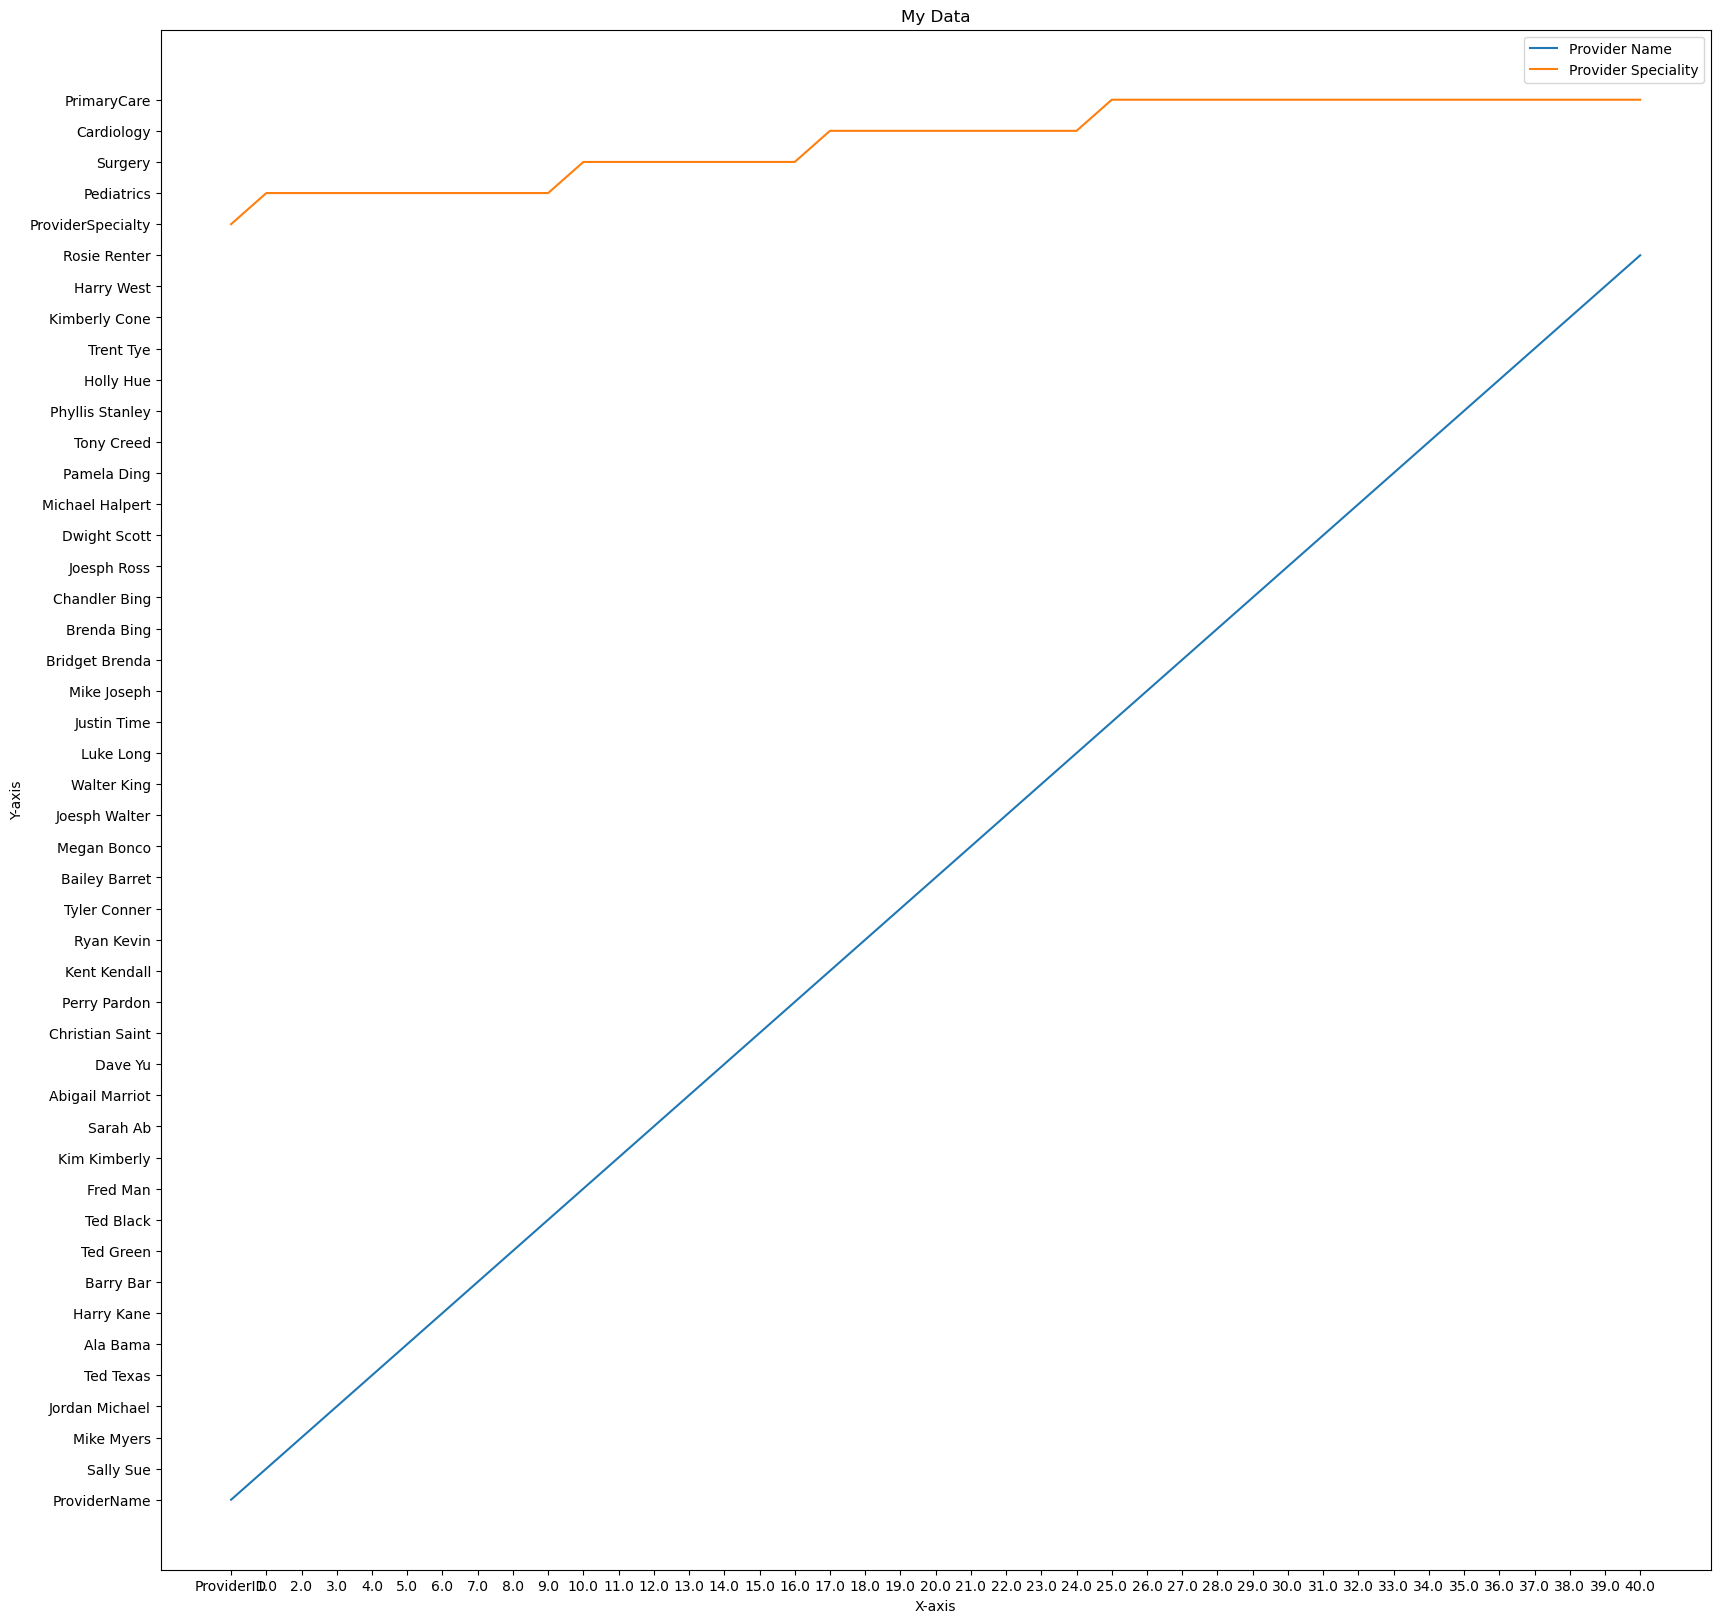

In [241]:
#Q61. Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).

wb = openpyxl.load_workbook('HospitalDatabase.xlsx')
sheet = wb['Providers']
x1 = [row[0].value for row in sheet.rows]
y1 = [row[1].value for row in sheet.rows]
x2 = [row[0].value for row in sheet.rows]
y2 = [row[2].value for row in sheet.rows]
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(x1, y1, label='Provider Name')
ax.plot(x2, y2, label='Provider Speciality')
ax.set_title('My Data')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.legend()
plt.show()


In [242]:
#Q62. Display the data for all 'White Female' patients above the age of 50.

df = pd.read_excel("HospitalDatabase.xlsx","Patients")
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['DateOfBirth'].dt.year
df_filtered = df.query("Gender=='Female' and Race =='White' and Age > 50")
display(df_filtered[['PatientID','FirstName','LastName', 'Age','Gender', 'Race']])

PatientID  FirstName   LastName  Age  Gender   Race
25          26      Sally       Bing   51  Female  White
28          29        Ted      Scott   56  Female  White
30          31      Harry       Ding   63  Female  White
33          34        Ted        Hue   63  Female  White
34          35       Fred        Tye   57  Female  White
..         ...        ...        ...  ...     ...    ...
865        866   Jermayne    Lowndes   53  Female  White
866        867       Gail        Inc   56  Female  White
867        868        Des  Heindrick   54  Female  White
869        870      Hauck    Rubbens   60  Female  White
873        874  Schroeder   McGarvey   52  Female  White

[122 rows x 6 columns]

In [243]:
#Q63. Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.

df = pd.read_excel("HospitalDatabase.xlsx","Patients",usecols = ["PatientID","FirstName","LastName"])
df.loc[101:200]

PatientID FirstName    LastName
101        102     Gipsy    Frankton
102        103    Jethro      Wharin
103        104       Viv     Aylward
104        105     Swift   Dreschler
105        106     Fadel  Jacquemard
..         ...       ...         ...
196        197      Noam    Laguerre
197        198      Arie     Bayless
198        199    Janaye     O'Mohun
199        200      Fonz       Group
200        201  Cummings      Pickup

[100 rows x 3 columns]

In [244]:
#Q64. "Using numpy functions, multiply the following arrays a=np.arange(6).reshape(2,3) b=np.arange(6).reshape(3,2)"


a = np.arange(6).reshape(2, 3)
b = np.arange(6).reshape(3, 2)
c = np.dot(a, b)

print(c)


[[10 13]
 [28 40]]


In [245]:
#Q65. Get the  number of patients based on service and primary diagnosis.

df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'Discharges', usecols = ['Service', 'PrimaryDiagnosis', 'PatientID'])
df.set_index(['Service', 'PrimaryDiagnosis'])
df.groupby(by = ['Service', 'PrimaryDiagnosis']).count()

PatientID
Service          PrimaryDiagnosis             
Cardiology       AMI                        40
                 Afib                       10
                 Broken Leg                  3
                 Flu                         2
                 Heart Failure              39
                 Kidney Failure              1
General Medicine Broken Leg                  3
                 Diabetes                   38
                 Fever                      13
                 Flu                        54
                 Hypertension               35
                 Kidney Failure             12
                 Laceration                 21
                 Pneumonia                  67
                 Stroke                     20
Hospitalist      AMI                         1
                 Broken Leg                  3
                 Diabetes                   26
                 Fever                       3
                 Flu                        19
                 Hypertension                6
                 Kidney Failure              6
                 Knee Replacement            1
                 Laceration                  7
                 Pneumonia                  28
                 Stroke                      1
ICU              AMI                         5
                 Afib                        1
                 Fever                       3
                 Flu                         3
                 Heart Failure              33
                 Hypertension                4
                 Kidney Failure              1
                 Laceration                  1
                 Pneumonia                  77
                 Spinal Cord Injury          2
                 Stroke                     21
Neurology        AMI                         2
                 Flu                         2
                 Heart Failure               6
                 Hypertension                5
                 Migraine                   12
                 Pain                        7
                 Pneumonia                   5
                 Stroke                     26
Orthopeadics     Hip Fracture               23
                 Knee Replacement           22

In [246]:
#Q66. np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30.

a = np.arange(1,31).reshape(6,5)
b = (a[0,-2:])
c = (a[4:,-2:])
d = c.ravel()
ar= np.hstack((b,d))
print(ar)

[ 4  5 24 25 29 30]


In [247]:
#Q67. Make a pivot table by the no. of patients from the admission date till discharge date.

df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'Discharges')
pt = df.pivot_table(values='PatientID',index=['AdmissionDate','DischargeDate'], aggfunc='count')
display(pt)

PatientID
AdmissionDate DischargeDate                     
2018-01-01    2018-01-04 19:59:31.391          1
              2018-01-04 21:28:51.898          1
              2018-01-04 22:28:23.672          1
              2018-01-05 05:47:04.933          1
              2018-01-05 14:18:30.029          1
...                                          ...
2018-02-22    2018-03-07 21:22:10.061          1
              2018-03-08 02:43:18.749          1
              2018-03-08 09:27:18.377          1
              2018-03-10 06:06:12.068          1
              2018-03-10 20:38:30.568          1

[720 rows x 1 columns]

In [251]:
#Q68. Display the data where actual LOS is greater than expected LOS.

df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'Discharges')
df['DischargeDate'] = pd.to_datetime(df['DischargeDate'])
df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'])
df['Difference'] = df.apply(lambda row: row['DischargeDate'] - row['AdmissionDate'], axis=1)
df['ActualLOS'] = df['Difference'].apply(lambda x: x.days)
df['Actualmorethanexpected'] = df.loc[df['ActualLOS'] >df['ExpectedLOS'],'ExpectedLOS']
df = df['Actualmorethanexpected'].dropna()
display(df)

1       6.816558
4       2.639297
5       2.981758
6       4.959098
7       2.279624
         ...    
712     3.539165
713     4.518876
714     8.542970
715    11.362095
719     7.195441
Name: Actualmorethanexpected, Length: 397, dtype: float64

In [252]:
#Q69. Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'Patients')
ignorecase = df['FirstName'].str.casefold().str.contains('lau') | df['LastName'].str.casefold().str.contains('lau')
result = df[ignorecase]

display(result)

PatientID FirstName   LastName             DateOfBirth  Gender  \
282        283    Lauren     Gaskal 1962-05-08 01:54:00.111  Female   
322        323    Lauren      Foort 1960-06-23 20:07:53.045  Female   
369        370    Zulauf  Ellingham 1982-12-17 16:27:56.391  Female   
382        383    Zulauf        LLC 1969-03-16 07:48:49.338  Female   
454        455    Zulauf      Alvar 1961-10-02 08:24:17.334  Female   
463        464    Zulauf     Manske 1965-06-22 02:49:28.667  Female   
818        819    Zulauf   Bitcheno 1967-04-02 07:17:53.635  Female   
830        831    Zulauf  O'Shavlan 1970-05-17 08:09:28.988  Female   
850        851     Lemmy    Klausen 1973-06-18 06:19:43.475  Female   
906        907  Jerrilyn    Klausen 1979-09-04 13:05:57.870    Male   
910        911    Zulauf     Orbine 1973-06-26 03:13:50.449    Male   

                       Race Language  
282  Black/African-American  English  
322                   White  English  
369                   White  English  
382                   White  English  
454                   White  English  
463                   White  English  
818                   White  English  
830                   White  English  
850                   White  English  
906  Black/African-American  English  
910  Black/African-American  English

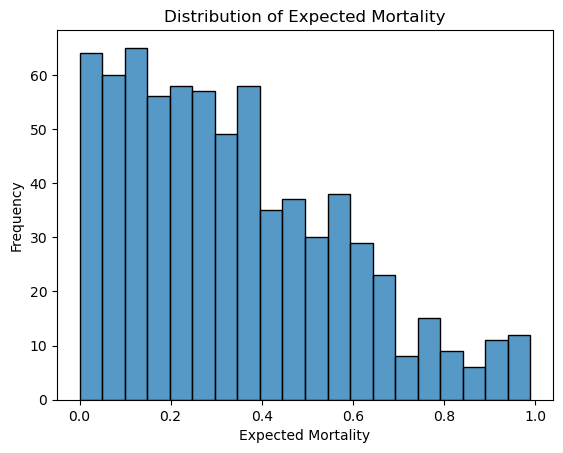

In [253]:
#Q70. Plot a graph to show the distribution of expected mortality.

df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'Discharges')
sns.histplot(data=df, x='ExpectedMortality', bins=20)
plt.xlabel('Expected Mortality')
plt.ylabel('Frequency')
plt.title('Distribution of Expected Mortality')
plt.show()

